In [4]:
### Setup the environment
import pandas as pd
import pandas_datareader as web
import numpy as np
import datetime
import matplotlib
import os
import scipy as sp
import scipy.optimize as scopt
import scipy.stats as spstats
import warnings
warnings.filterwarnings("ignore")
matplotlib.use('TKAgg')
%matplotlib inline
import pylab as py
py.ion()

HOME=os.environ['HOME']

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [21]:
### Get Historical Data for individual equity in the stock
def get_historical_closes(tickers,start,end):
    def data(ticker):
        return web.DataReader(ticker, 'yahoo', start, end)
    datas = map(data, tickers) ## this is a nice concept.. map applies function "data" to the items of sequence "ticker"
    all_data=pd.concat(datas, keys=tickers, names=['Ticker','Date'])
    all_data_reset = all_data[['Adj Close']].reset_index()
    pivot = all_data_reset.pivot('Date', 'Ticker','Adj Close')
    return pivot

def plot_ticker_data(ticker,sd,ed):
    closes=get_historical_closes(ticker,sd,ed)
    norm_closes=100*((closes-closes.iloc[0])/closes.iloc[0])
    norm_closes.plot()


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text yticklabel objects>)

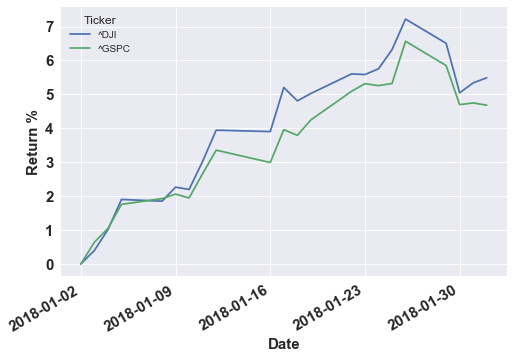

In [22]:
## Markets for the Month of Jan
sd='2018-1-1';ed='2018-1-31'
ticker=['^GSPC','^DJI']
plot_ticker_data(ticker,sd,ed)
py.xlabel('Date',fontsize=15,fontweight='bold')
py.ylabel('Return %',fontsize=15,fontweight='bold')
py.xticks(fontsize=15,fontweight='bold')
py.yticks(fontsize=15,fontweight='bold')

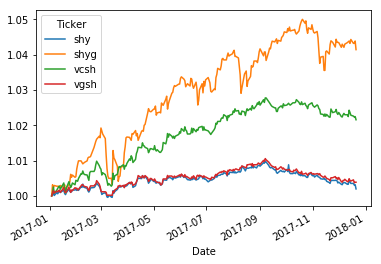

In [3]:
sd='2017-1-1';ed='2017-12-31'
cash_ticker=['shy','shyg','vgsh','vcsh']
plot_ticker_data(cash_ticker,sd,ed)

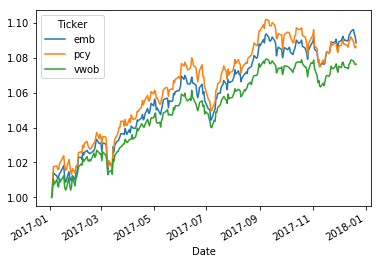

In [4]:
international_bond=['emb','vwob','pcy']
plot_ticker_data(international_bond,sd,ed)

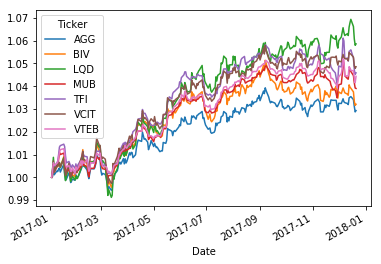

In [5]:
US_Bond=['AGG','BIV','TFI','MUB','LQD','VCIT','VTEB']
plot_ticker_data(US_Bond,sd,ed)

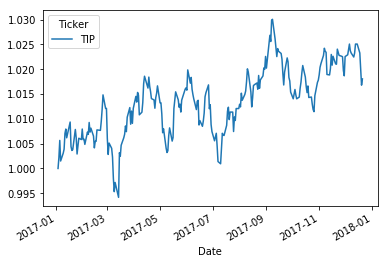

In [6]:
TIP=['TIP']
plot_ticker_data(TIP,sd,ed)

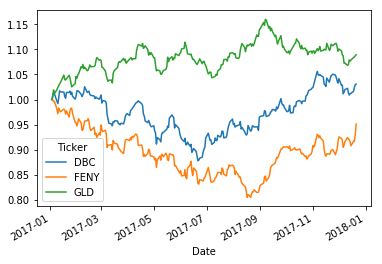

In [7]:
com=['DBC','FENY','GLD']
plot_ticker_data(com,sd,ed)

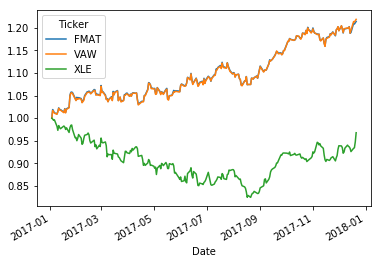

In [8]:
nat=['FMAT','XLE','VAW']
plot_ticker_data(nat,sd,ed)

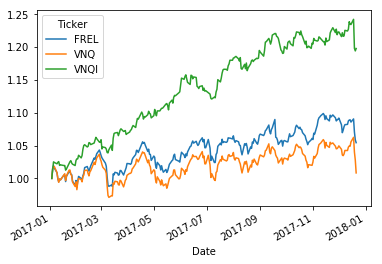

In [9]:
reits=['VNQ','VNQI','FREL']
plot_ticker_data(reits,sd,ed)

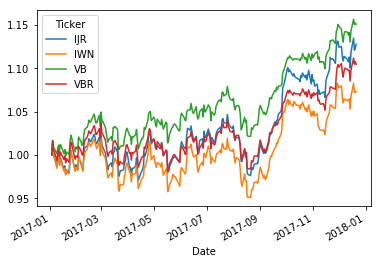

In [10]:
sml_cap=['IJR','VBR','VB','IWN']
plot_ticker_data(sml_cap,sd,ed)

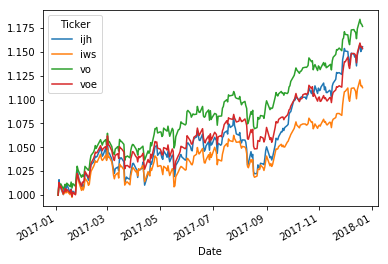

In [11]:
mid_cap=['ijh','vo','iws','voe']
plot_ticker_data(mid_cap,sd,ed)

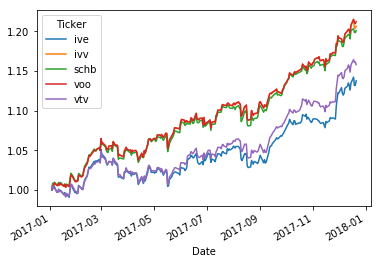

In [12]:
large_cap=['ivv','voo','vtv','ive','schb']
plot_ticker_data(large_cap,sd,ed)

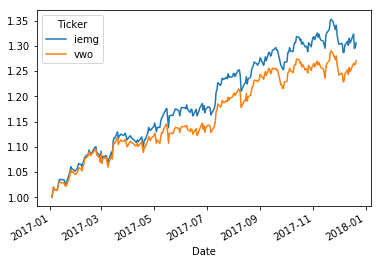

In [13]:
emer_stk=['iemg','vwo']
plot_ticker_data(emer_stk,sd,ed)

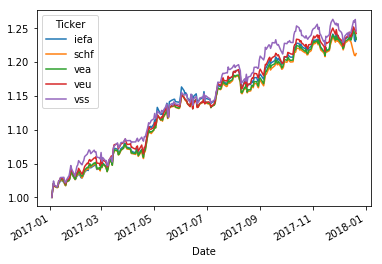

In [14]:
dev_stk=['iefa','veu','vea','vss','schf']
plot_ticker_data(dev_stk,sd,ed)

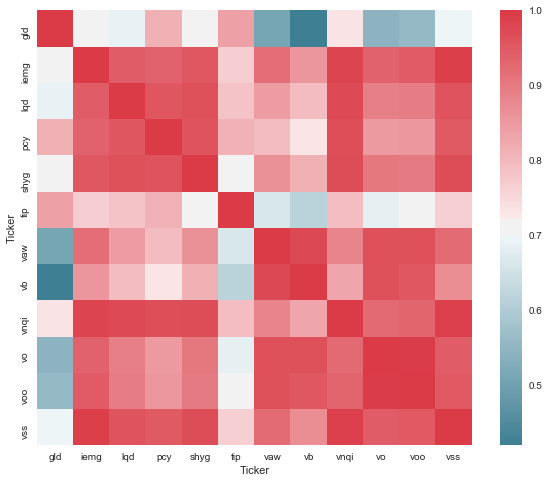

In [15]:
## Best 7-Twelve Portfolio
port=['shyg','pcy','lqd','tip','gld','vaw','vnqi','vb','vo','voo','iemg','vss']
pdata=get_historical_closes(port,sd,ed)
import seaborn as sns
c_port=pdata.corr()
f, ax = py.subplots(figsize=(10, 8))
sns.heatmap(c_port, mask=np.zeros_like(c_port, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

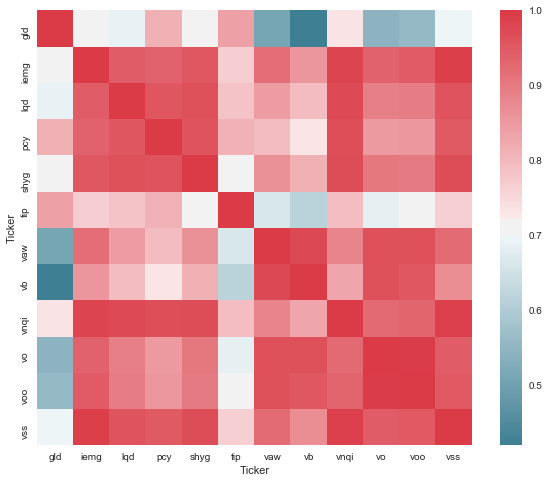

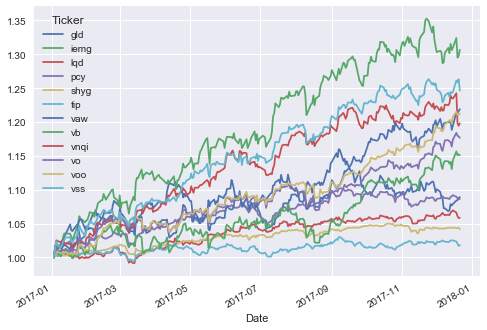

In [16]:
import seaborn as sns
c_port=pdata.corr()

f, ax = py.subplots(figsize=(10, 8))
sns.heatmap(c_port, mask=np.zeros_like(c_port, dtype=np.bool),\
            cmap=sns.diverging_palette(220, 10, as_cmap=True),\
            square=True, ax=ax)
plot_ticker_data(port,sd,ed)

17.1758416939
9.4103399803


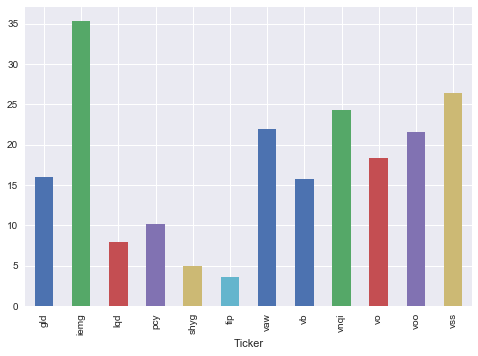

In [17]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
pdata_MinMax=pdata.apply(minMax).T
pdata_MinMax['diff']=100*(pdata_MinMax['max']-pdata_MinMax['min'])/pdata_MinMax['min']
pdata_MinMax['diff'].plot(kind='bar')

print pdata_MinMax['diff'].mean()
print pdata_MinMax['diff'].std()

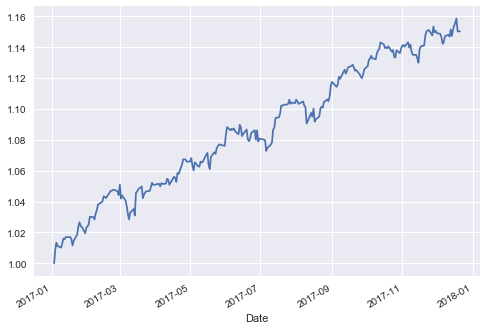

In [18]:
norm_pdata=pdata/pdata.iloc[0]
cum=norm_pdata.sum(axis=1)
(cum/cum.iloc[0]).plot()

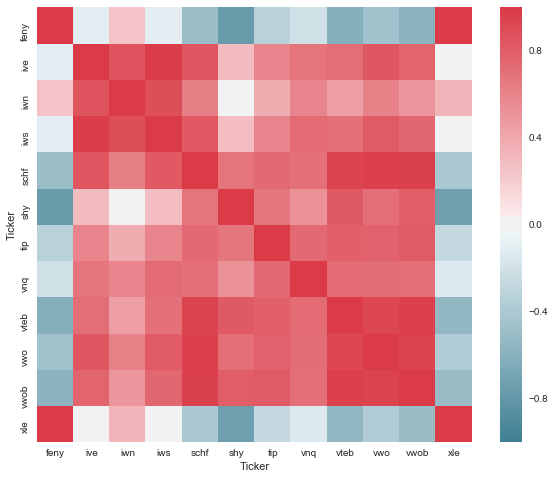

In [19]:
#Worst 7-Twelve Portfolio
wport=['shy','vwob','vteb','tip','feny','xle','vnq','iwn','iws','ive','vwo','schf']
wpdata=get_historical_closes(wport,sd,ed)
import seaborn as sns
wc_port=wpdata.corr()
f, ax = py.subplots(figsize=(10, 8))
sns.heatmap(wc_port, mask=np.zeros_like(wc_port, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

13.9159209135
9.0252044853


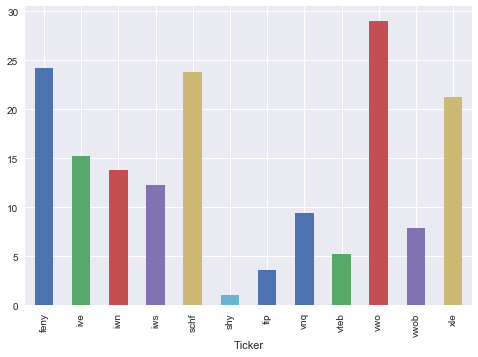

In [20]:
wpdata_MinMax=wpdata.apply(minMax).T
wpdata_MinMax['diff']=100*(wpdata_MinMax['max']-wpdata_MinMax['min'])/wpdata_MinMax['min']
wpdata_MinMax['diff'].plot(kind='bar')
print wpdata_MinMax['diff'].mean()
print wpdata_MinMax['diff'].std()

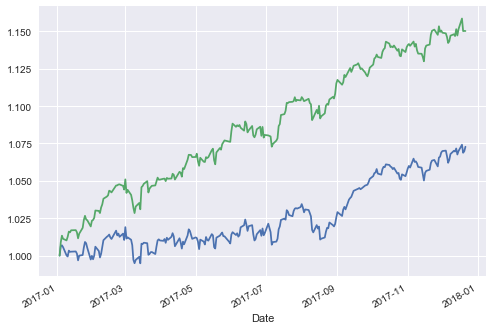

In [21]:
norm_wpdata=wpdata/wpdata.iloc[0]
wcum=norm_wpdata.sum(axis=1)

fig, ax = py.subplots(1, 1)
(wcum/wcum.iloc[0]).plot(ax=ax)
(cum/cum.iloc[0]).plot(ax=ax)


In [7]:
Ind_Stocks=['WFC','CMG','SEP','CRTO','DIS','QCOM','CVS','ESRX','KKR','FIT']
sd='2016-1-1';ed='2017-12-31'
is_data=get_historical_closes(Ind_Stocks,sd,ed)

Ticker    CMG   CRTO    CVS  ...     QCOM    SEP    WFC
Ticker                       ...                       
CMG     1.000  0.168  0.562  ...   -0.395 -0.120 -0.447
CRTO    0.168  1.000 -0.198  ...   -0.169  0.459  0.249
CVS     0.562 -0.198  1.000  ...   -0.517  0.064 -0.758
DIS    -0.090  0.530 -0.552  ...    0.115  0.284  0.812
ESRX    0.290 -0.394  0.570  ...   -0.005 -0.168 -0.434
FIT     0.416 -0.505  0.842  ...   -0.317 -0.221 -0.795
KKR    -0.597  0.292 -0.827  ...    0.313  0.239  0.869
QCOM   -0.395 -0.169 -0.517  ...    1.000 -0.101  0.294
SEP    -0.120  0.459  0.064  ...   -0.101  1.000  0.211
WFC    -0.447  0.249 -0.758  ...    0.294  0.211  1.000

[10 rows x 10 columns]


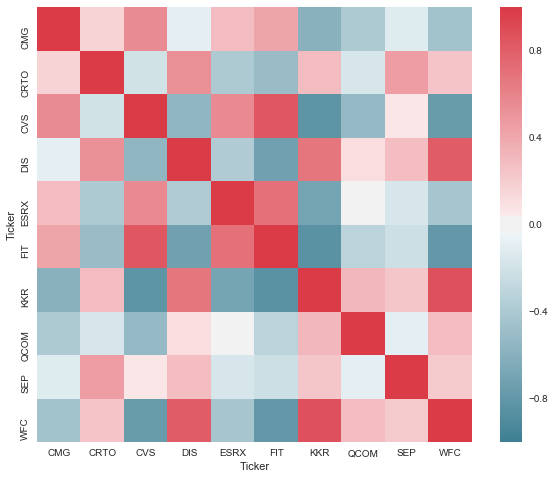

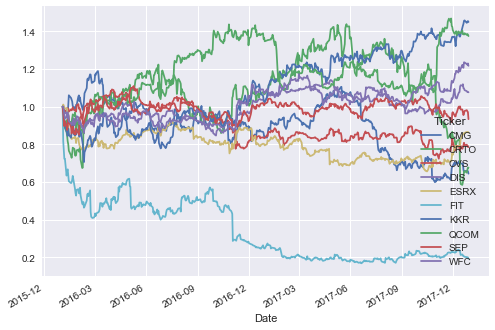

In [9]:
import seaborn as sns
c_port=is_data.corr()
print c_port
f, ax = py.subplots(figsize=(10, 8))
sns.heatmap(c_port, mask=np.zeros_like(c_port, dtype=np.bool),\
            cmap=sns.diverging_palette(220, 10, as_cmap=True),\
            square=True, ax=ax)
plot_ticker_data(is_data,sd,ed)